In [ ]:
#Required Installation
'''
! apt install tesseract-ocr
! apt install libtesseract-dev

!pip install pytesseract

import pytesseract
from PIL import Image
import requests
from io import BytesIO
import cv2
import numpy as np

!ls -airt /usr/bin/tesseract

pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract' '''

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 24 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 3s (1,887 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 122519 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-eng_1%3

In [ ]:
!wget https://raw.githubusercontent.com/BigPino67/Tesseract-MICR-OCR/master/Tessdata/mcr.traineddata

!cp mcr.traineddata /usr/share/tesseract-ocr/4.00/tessdata

--2023-05-12 19:20:20--  https://raw.githubusercontent.com/BigPino67/Tesseract-MICR-OCR/master/Tessdata/mcr.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 147363 (144K) [application/octet-stream]
Saving to: ‘mcr.traineddata.1’

mcr.traineddata.1   100%[===================>] 143.91K  --.-KB/s    in 0.002s  

2023-05-12 19:20:20 (66.0 MB/s) - ‘mcr.traineddata.1’ saved [147363/147363]



In [ ]:
! pip install Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Loading libraries

import numpy as np
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab.patches import cv2_imshow
from tensorflow.keras.models import load_model
import pytesseract
from PIL import Image,ImageOps
import requests
from io import BytesIO


In [ ]:
#loading Check Image
def get_images(filepath):
  cheque = cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
  cheque1 = cv2.imread(filepath)
  cv2_imshow(cheque1)
  cv2.imwrite('/content/cheque.jpg',cheque)


  img = Image.open('/content/cheque.jpg')
  imgbin = ImageOps.invert(img)
  ret11,th = cv2.threshold(np.array(img),0.,255.,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
  #_,I = cv2.threshold(cheque,0.,255.,cv2.THRESH_OTSU)
  imgbw = img.point(lambda p:p > ret11 and 255)
  kernal = np.ones((3,3),np.uint8)
  erosion = cv2.erode(np.array(imgbw),kernal,iterations = 1)
  erosion = cv2.bitwise_not(erosion)
  erosion = np.array(erosion)
  cv2_imshow(erosion)

  I= erosion

  _,labels,stats,centroid = cv2.connectedComponentsWithStats(I)

  result = np.zeros((I.shape[0],I.shape[1],3),np.uint8)
  result1 = np.zeros((I.shape[0],I.shape[1],3),np.uint8)
  result2 = np.zeros((I.shape[0],I.shape[1],3),np.uint8)
  result3 = np.zeros((I.shape[0],I.shape[1],3),np.uint8)
  contours = []
  Contours = []
  X = []
  Y = []
  H = []
  W = []

  Char =[]
  Char_X =[]
  Char_Y =[]
  Char_H =[]
  Char_W =[]
  new_cnt = []
  x1=[]
  y1=[]
  h1=[]
  w1=[]

  for i in range(0,labels.max()+1):
      mask = cv2.compare(labels,i,cv2.CMP_EQ)

      ctrs,_ = cv2.findContours(mask,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

      for cnt in ctrs:
        contours.append(cnt)
        x,y,h,w =cv2.boundingRect(cnt)
        aspect_ratio = float(w)/h
        #print('x',x,'y',y,'h',h,'w',w)
        #print(aspect_ratio)

        if (h > 400 and h < 1000):
          Contours.append(cnt)
          x,y,h,w =cv2.boundingRect(cnt)
          aspect_ratio = float(w)/h
          #print('x',x,'y',y,'h',h,'w',w)
          #print(aspect_ratio)
          X.append(x)
          Y.append(y)
          H.append(h)
          W.append(w)
        if (h>1000 and w>20 and w<500):
          Char.append(cnt)
          x,y,h,w =cv2.boundingRect(cnt)
          #print('x',x,'y',y,'h',h,'w',w)
          Char_X.append(x)
          Char_Y.append(y)
          Char_H.append(h)
          Char_W.append(w)
      '''if (y>500 and w>80 and w<100):
        Temp.append(cnt)
        x,y,h,w =cv2.boundingRect(cnt)
        print('x',x,'y',y,'h',h,'w',w)
        Temp_X = x
        Temp_Y = y
        Temp_H = h
        Temp_W = w'''
      result = cv2.drawContours(result,Contours,-1,(255,255,255),3)
      result1 = cv2.drawContours(result1,Char,-1,(255,255,255),3)

      for cnt in contours:
        x,y,h,w =cv2.boundingRect(cnt)
        if y>900 and w>10:
          new_cnt.append(cnt)
          x,y,h,w =cv2.boundingRect(cnt)
          #print('x',x,'y',y,'h',h,'w',w)
          x1.append(x)
          y1.append(y)
          h1.append(h)
          w1.append(w)




      result2 = cv2.drawContours(result,new_cnt,-1,(255,255,255),3)
  cv2_imshow(result)
  cv2_imshow(result1)
  cv2_imshow(result2)



  cheque1 = cv2.imread(filepath)
  #cv2_imshow(cheque1)
  Date = cheque1[Y[0]-5:Y[0]+W[0]+5,X[0]-5:X[0]+H[0]+5]
  cv2_imshow(Date)
  Amount = cheque1[Y[1]-5:Y[1]+W[1]+5,X[1]-5:X[1]+H[1]+5]
  cv2_imshow(Amount)
  Acc_No = cheque1[Y[2]-5:Y[2]+W[2]+5,X[2]-5:X[2]+H[2]+5]
  cv2_imshow(Acc_No)
  Name = cheque1[Char_Y[0]-5:Char_Y[0]+Char_W[0]+5,Char_X[0]-5:Char_X[0]+Char_H[0]+5]
  cv2_imshow(Name)
  Legel_Amount = cheque1[Char_Y[1]-5:Char_Y[1]+Char_W[1]+5,Char_X[1]-5:]
  cv2_imshow(Legel_Amount)
  cv2.imwrite('/content/Date.jpg', Date)
  Date_path = '/content/Date.jpg'
  cv2.imwrite('/content/Amount.jpg', Amount)
  Amount_path = '/content/Amount.jpg'
  cv2.imwrite('/content/Acc_No.jpg', Acc_No)
  Acc_No_path = '/content/Acc_No.jpg'
  cv2.imwrite('/content/Name.jpg', Name)
  Name_path = '/content/Name.jpg'
  cv2.imwrite('/content/Legel_Amount.jpg', Legel_Amount)
  Legal_Amount_path = '/content/Legel_Amount.jpg'


  x1.sort()
  y1.sort()
  h1.sort()
  w1.sort()

  mcr = cheque1[y1[0]-40:y1[len(y1)-1]+w1[len(w1)-1]+40,:]
  cv2_imshow(mcr)
  cv2.imwrite('micr.png',mcr)
  mcr_path = 'micr.png'

  return Date,Amount,Acc_No,Name,Legel_Amount,mcr,Date_path,Amount_path,Acc_No_path,Name_path,Legal_Amount_path,mcr_path

def get_date(Date_path):

  I = cv2.imread('Date.jpg',cv2.IMREAD_GRAYSCALE)
  I1 = cv2.imread('Date.jpg',cv2.IMREAD_GRAYSCALE)

  _,I = cv2.threshold(I,0.,255.,cv2.THRESH_OTSU)
  I = cv2.bitwise_not(I)

  _,labels,stats,centroid = cv2.connectedComponentsWithStats(I)

  result1 = np.zeros((I.shape[0],I.shape[1],3),np.uint8)
  result2 = np.zeros((I.shape[0],I.shape[1],3),np.uint8)
  contours = []
  Date_num =[]
  for i in range(0,labels.max()+1):
    mask = cv2.compare(labels,i,cv2.CMP_EQ)

    ctrs,_ = cv2.findContours(mask,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

    for cnt in ctrs:
      contours.append(cnt)
      x,y,h,w =cv2.boundingRect(cnt)
      aspect_ratio = float(w)/h
      #print('x',x,'y',y,'h',h,'w',w)
      #print(aspect_ratio)
      if (w>10 and w<60):
        Date_num.append(cnt)
        x,y,h,w =cv2.boundingRect(cnt)
        print('x',x,'y',y,'h',h,'w',w)


      result1 = cv2.drawContours(result1,Date_num,-1,(255,255,255),3)

  cv2_imshow(result1)

  X1 = []
  Date_num_asc = []
  for cnt in Date_num:
    x1,y,h,w =cv2.boundingRect(cnt)
    X1.append(x1)
  print(X1)
  X1.sort()
  print(X1)

  i=0
  Date_Num = Date_num
  while len(Date_num)!=0:
    print(len(Date_num))
    for cnt in Date_Num:
      x,y,h,w =cv2.boundingRect(cnt)
      print(x)
      if i == 8:
        i=10
        break
      if x == X1[i]:
        print('i',i)
        print(x)
        Date_num_asc.append(cnt)
        #Date_num.remove(cnt)
        x,y,z,w = cv2.boundingRect(cnt)
        print('x',x)
        i=i+1
        print(len(Date_num))
    if i==10:
      break
  Dates = []
  for cnt in Date_num_asc:
    x,y,h,w =cv2.boundingRect(cnt)
    Dates.append(I1[y-5:y+w+5,x-5:x+h+5])

  j=0
  for ch in Dates:
    ch = cv2.resize(ch,(28,28))
    cv2_imshow(ch)
    cv2.imwrite('ch'+str(j)+'.png',ch)
    j=j+1
  return Dates

def preprocess_Date(Dates):
  X_new = []

  for ch in Dates:
    img1= Image.fromarray(ch)
    ret11,th = cv2.threshold(np.array(img1),0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    imgbw = img1.point(lambda p:p > ret11 and 255)
    kernal = np.ones((2,2),np.uint8)
    erosion = cv2.dilate(np.array(imgbw),kernal,iterations = 0)
    erosion = cv2.bitwise_not(erosion)
    erosion = np.array(erosion)
    erosion = cv2.resize(erosion, (28,28))
    X_new.append(erosion)
  for i in range(8):
    '''cv2_imshow(X_new[i]) '''
  X_new = np.asarray(X_new)

  return X_new

def recognize_Date(X_new):
  chars =[]
  for i in range(8):
    img = X_new[i]
    #cv2_imshow(img)
    img = img.reshape(1,28,28,1)
    img = img.astype('float32')
    img = img/255.0
    # one-hot vector output
    vec_p1 = model.predict(img)
    #print(vec_p1)
    # determine the lable corresponding to vec_p
    Y_p1 = np.argmax(vec_p1)
    #print(Y_p1)
    chars.append(Y_p1)
  Date = str(chars[0]) + str(chars[1]) + str(chars[2])+ str(chars[3])+ str(chars[4])+ str(chars[5])+ str(chars[6])+ str(chars[7])
  #print('Date',Date)
  return Date

def get_Amount(Amount_path):

  I = cv2.imread(Amount_path,cv2.IMREAD_GRAYSCALE)
  I1 = cv2.imread(Amount_path,cv2.IMREAD_GRAYSCALE)
  _,I = cv2.threshold(I,0.,255.,cv2.THRESH_OTSU)
  I = cv2.bitwise_not(I)

  _,labels,stats,centroid = cv2.connectedComponentsWithStats(I)

  result1 = np.zeros((I.shape[0],I.shape[1],3),np.uint8)
  result2 = np.zeros((I.shape[0],I.shape[1],3),np.uint8)
  result = np.zeros((I.shape[0],I.shape[1],3),np.uint8)
  contours = []
  Contours =[]
  Amount = []
  X_a = []
  Y_a = []
  H_a = []
  W_a = []
  for i in range(0,labels.max()+1):
    mask = cv2.compare(labels,i,cv2.CMP_EQ)

    ctrs,_ = cv2.findContours(mask,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

    for cnt in ctrs:
      contours.append(cnt)
      x,y,h,w =cv2.boundingRect(cnt)
      aspect_ratio = float(w)/h
      #print('x',x,'y',y,'h',h,'w',w)
      #print(aspect_ratio)
      if (w>10 and w<100 and x>100):
        Contours.append(cnt)
        x,y,h,w =cv2.boundingRect(cnt)
        #print('x',x,'y',y,'h',h,'w',w)
        X_a.append(x)
        Y_a.append(y)
        H_a.append(h)
        W_a.append(w)
        '''if (x<360 and y<74):
          Amount.append(cnt)
          x,y,h,w =cv2.boundingRect(cnt)
          print('x',x,'y',y,'h',h,'w',w)'''




      result1 = cv2.drawContours(result1,Contours,-1,(255,255,255),3)
      #result2 = cv2.drawContours(result2,contours,-1,(255,255,255),3)
      #result = cv2.drawContours(result,Amount,-1,(255,255,255),3)
  #cv2_imshow(result2)
  #cv2_imshow(result1)
  #cv2_imshow(result)
  #cv2.imwrite('/content/c.jpg', result1)
  #cv2.imwrite('/content/c1.jpg', result2)
  Y_a.sort()
  X_a.sort()
  Cnt = []
  for cnt in Contours:
    x,y,h,w = cv2.boundingRect(cnt)
    if x < X_a[len(X_a)-2] and y!=Y_a[len(Y_a)-1] :
      Cnt.append(cnt)
  Contours =Cnt
  #print(len(Contours))
  Amount = Contours
  result3 = np.zeros((I.shape[0],I.shape[1],3),np.uint8)
  for cnt in Amount:
    result3 = cv2.drawContours(result3,cnt,-1,(255,255,255),3)
    x,y,h,w = cv2.boundingRect(cnt)
    #print(x,y,h,w)
  #cv2_imshow(result3)

  X1 = []
  Amount_Asc = []
  for cnt in Amount:
    x1,y,h,w =cv2.boundingRect(cnt)
    X1.append(x1)
  X1.sort()
  #print(X1)

  i=0
  while len(Amount)!=0:
    for cnt in Amount:
      x,y,h,w =cv2.boundingRect(cnt)
      if x == X1[i]:
        Amount_Asc.append(cnt)
        Amount.remove(cnt)
        i=i+1

  Amounts = []
  for cnt in Amount_Asc:
    x,y,h,w =cv2.boundingRect(cnt)
    Amounts.append(I1[y-5:y+w+5,x-5:x+h+5])

  for ch in Amounts:
    ch = cv2.resize(ch,(28,28))
    #cv2_imshow(ch)
  return Amounts



def preprocess_Amount(Amounts):
  X_new = []

  for ch in Amounts:
    img1= Image.fromarray(ch)
    ret11,th = cv2.threshold(np.array(img1),0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    imgbw = img1.point(lambda p:p > ret11 and 255)
    kernal = np.ones((2,2),np.uint8)
    erosion = cv2.dilate(np.array(imgbw),kernal,iterations = 1)
    erosion = cv2.bitwise_not(erosion)
    erosion = np.array(erosion)
    erosion = cv2.resize(erosion, (28,28))
    X_new.append(erosion)
  ''' for i in range(len(X_new)):
    cv2_imshow(X_new[i])'''
  return X_new

def recognize_Amount(X_new):
  chars =[]
  for i in range(len(X_new)):
    img = X_new[i]
    #cv2_imshow(img)
    img = img.reshape(1,28,28,1)
    img = img.astype('float32')
    img = img/255.0
    # one-hot vector output
    vec_p1 = model.predict(img)
    #print(vec_p1)
    # determine the lable corresponding to vec_p
    Y_p1 = np.argmax(vec_p1)
    #print(Y_p1)
    chars.append(Y_p1)
  Amount = str(chars[0]) + str(chars[1]) + str(chars[2])+ str(chars[3])+ str(chars[4])+ str(chars[5])
  #print('Amount',Amount)
  return Amount




def get_Acc_no(Acc_No_path):
  I = cv2.imread(Acc_No_path,cv2.IMREAD_GRAYSCALE)

  _,I = cv2.threshold(I,0.,255.,cv2.THRESH_OTSU)
  I = cv2.bitwise_not(I)

  _,labels,stats,centroid = cv2.connectedComponentsWithStats(I)

  result1 = np.zeros((I.shape[0],I.shape[1],3),np.uint8)
  result2 = np.zeros((I.shape[0],I.shape[1],3),np.uint8)
  contours = []
  Contours =[]
  for i in range(0,labels.max()+1):
    mask = cv2.compare(labels,i,cv2.CMP_EQ)

    ctrs,_ = cv2.findContours(mask,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

    for cnt in ctrs:
      contours.append(cnt)
      x,y,h,w =cv2.boundingRect(cnt)
      aspect_ratio = float(w)/h
      #print('x',x,'y',y,'h',h,'w',w)
      #print(aspect_ratio)
      if (w>10 and w<50 and x>200):
        Contours.append(cnt)
        x,y,h,w =cv2.boundingRect(cnt)
        #print('x',x,'y',y,'h',h,'w',w)


      result1 = cv2.drawContours(result1,Contours,-1,(255,255,255),3)
      result2 = cv2.drawContours(result2,contours,-1,(255,255,255),3)
  #cv2_imshow(result2)
  #cv2_imshow(result1)


  X1 = []
  Ac_num_asc = []
  for cnt in Contours:
    x1,y,h,w =cv2.boundingRect(cnt)
    X1.append(x1)
  X1.sort()
  #print(X1)

  i=0
  while len(Contours)!=0:
    for cnt in Contours:
      x,y,h,w =cv2.boundingRect(cnt)
      if x == X1[i]:
        Ac_num_asc.append(cnt)
        Contours.remove(cnt)
        i=i+1

  Acs = []
  for cnt in Ac_num_asc:
    x,y,h,w =cv2.boundingRect(cnt)
    Acs.append(I[y-2:y+w+2,x-2:x+h+2])


  for ch in Acs:
    ch = cv2.resize(ch,(28,28))
    #cv2_imshow(ch)
  return Acs

def preprocess_Acc_no(Acs):
  X_new = []

  for ch in Acs:
    img1= Image.fromarray(ch)
    ret11,th = cv2.threshold(np.array(img1),0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    imgbw = img1.point(lambda p:p > ret11 and 255)
    kernal = np.ones((2,2),np.uint8)
    erosion = cv2.erode(np.array(imgbw),kernal,iterations = 0)
    #erosion = cv2.bitwise_not(erosion)
    erosion = np.array(erosion)
    erosion = cv2.resize(erosion, (28,28))
    X_new.append(erosion)
  ''' for i in range(12):
    cv2_imshow(X_new[i]) '''
  X_new = np.asarray(X_new)

  return X_new

def predict_Acc_No(X_new):
  chars =[]
  for i in range(15):
    img = X_new[i]
    #cv2_imshow(img)
    img = img.reshape(1,28,28,1)
    img = img.astype('float32')
    img = img/255.0
    # one-hot vector output
    vec_p1 = model.predict(img)
    #print(vec_p1)
    # determine the lable corresponding to vec_p
    Y_p1 = np.argmax(vec_p1)
    #print(Y_p1)
    chars.append(Y_p1)
  AC_no = str(chars[0]) + str(chars[1]) + str(chars[2])+ str(chars[3])+ str(chars[4])+ str(chars[5])+ str(chars[6])+ str(chars[7])+str(chars[8]) + str(chars[9]) + str(chars[10])+ str(chars[11])+ str(chars[12])+str(chars[13]) + str(chars[14])

  #print('Ac_no',AC_no)

  image = Image.open(Acc_No_path)
  Ac_No = pytesseract.image_to_string(image,lang ='eng')

  Ac_no = Ac_No.strip()
  Ac_no = Ac_no.replace('/n','')
  new_str=""
  for ch in Ac_no:
    if ch in ("0","1","2","3","4","5","6","7","8","9") :
      new_str =new_str + ch

  Acc_No=new_str
  #print(Acc_No)


  #print(Ac_No)

  return AC_no,Acc_No


def get_mcr(mcr_path):
  image = Image.open(mcr_path)


  #print(pytesseract.image_to_string(image,lang ='eng'))

  check_img = cv2.cvtColor(np.array(image),cv2.COLOR_RGB2BGR)

  micr_img = check_img

  check_img.shape

  #cv2_imshow(micr_img)

  micr = pytesseract.image_to_string(micr_img,lang ='mcr')

  #print(micr)



  mcr =micr.replace(" ", "")


  cheque_number = mcr[1:7]
  #print(cheque_number)
  MICR_Code = mcr[8:17]
  #print(MICR_Code)
  Acc_ID = mcr[18:24]
  #print(Acc_ID)
  Trans_Code = mcr[25:27]
  #print(Trans_Code)
  return cheque_number,MICR_Code,Acc_ID,Trans_Code



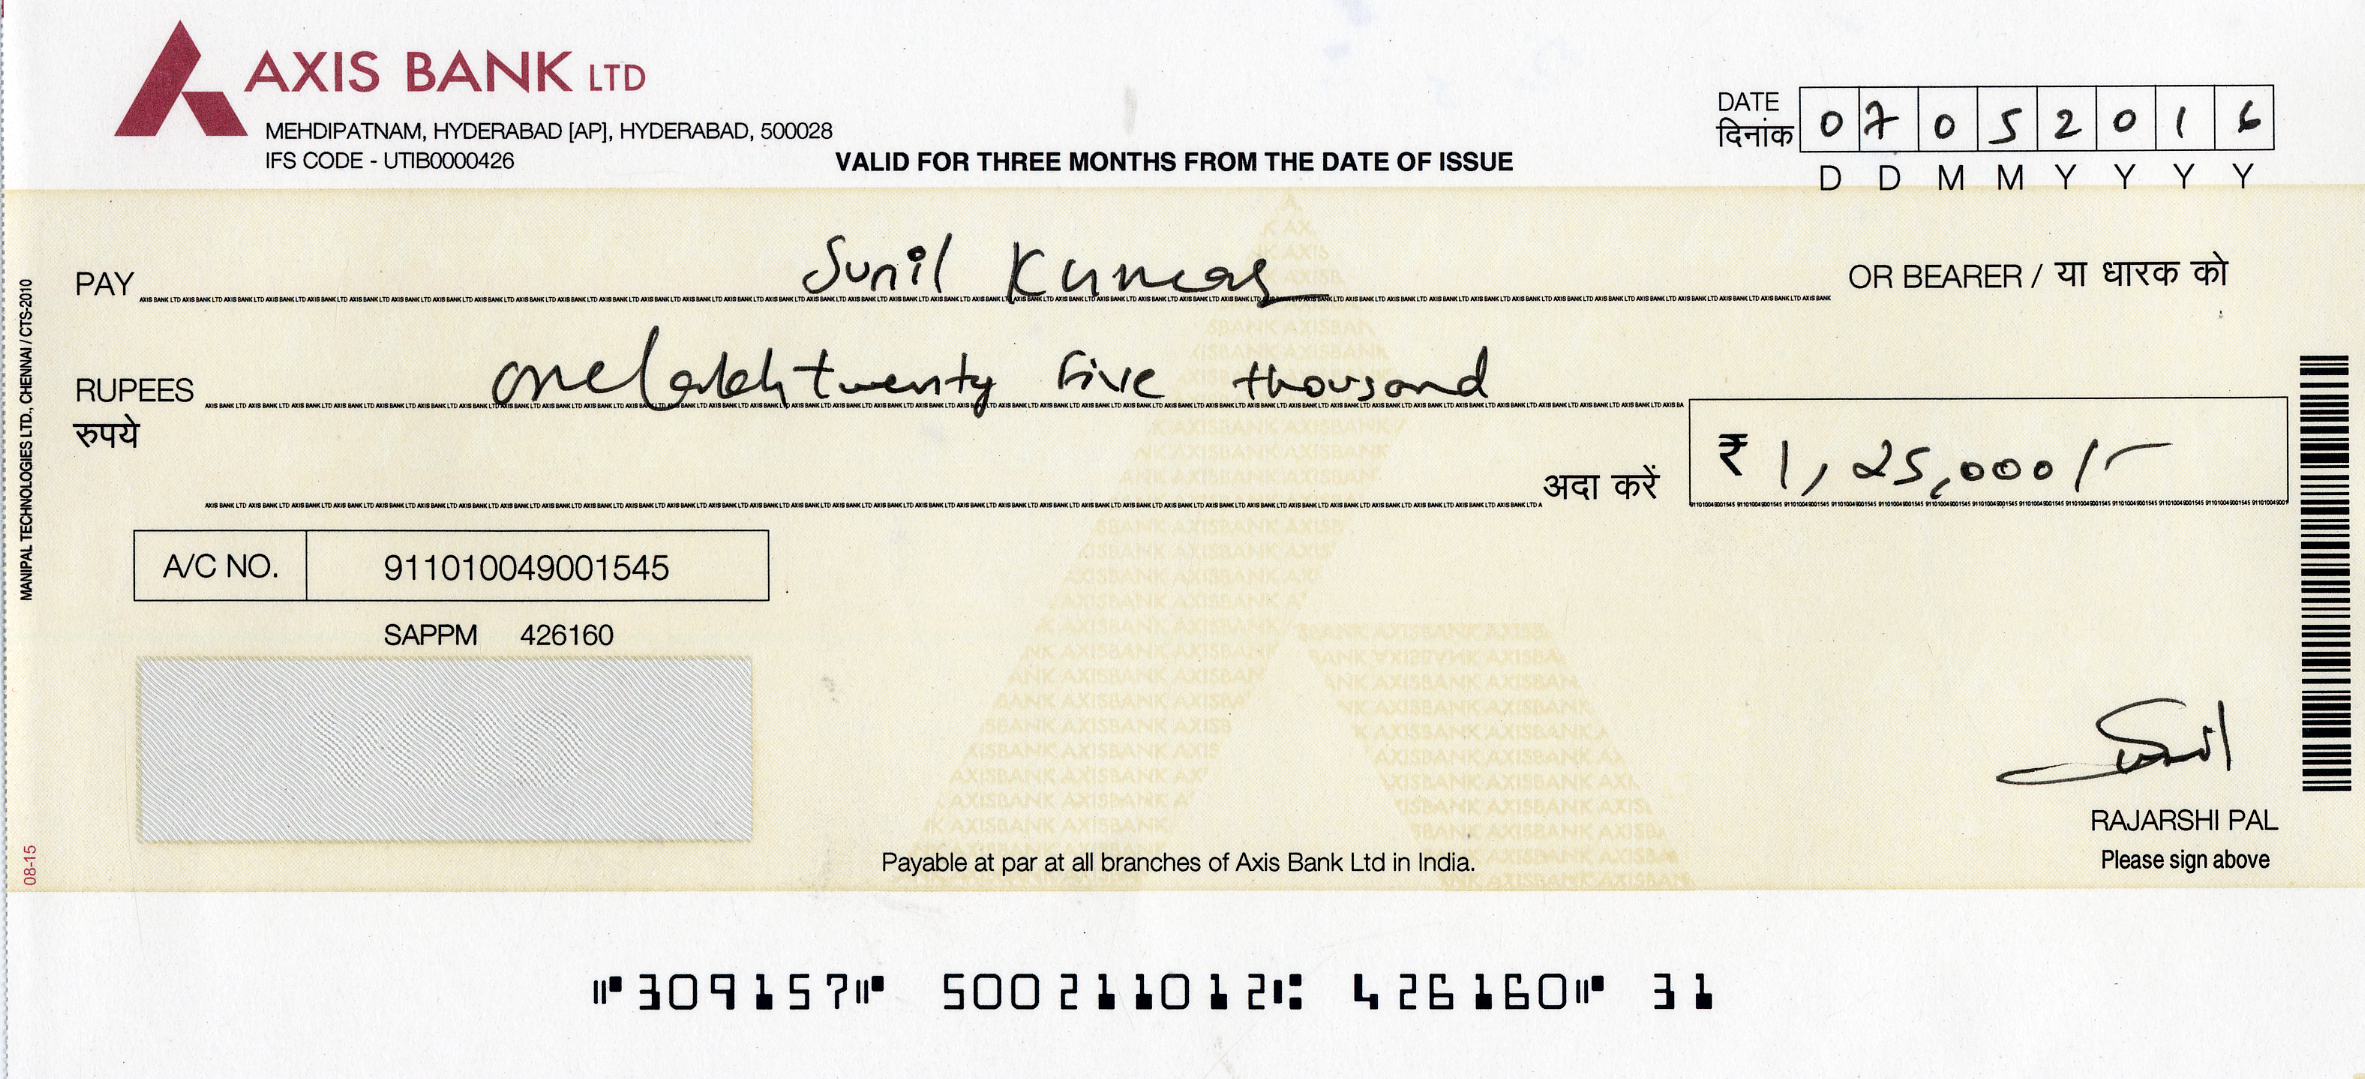

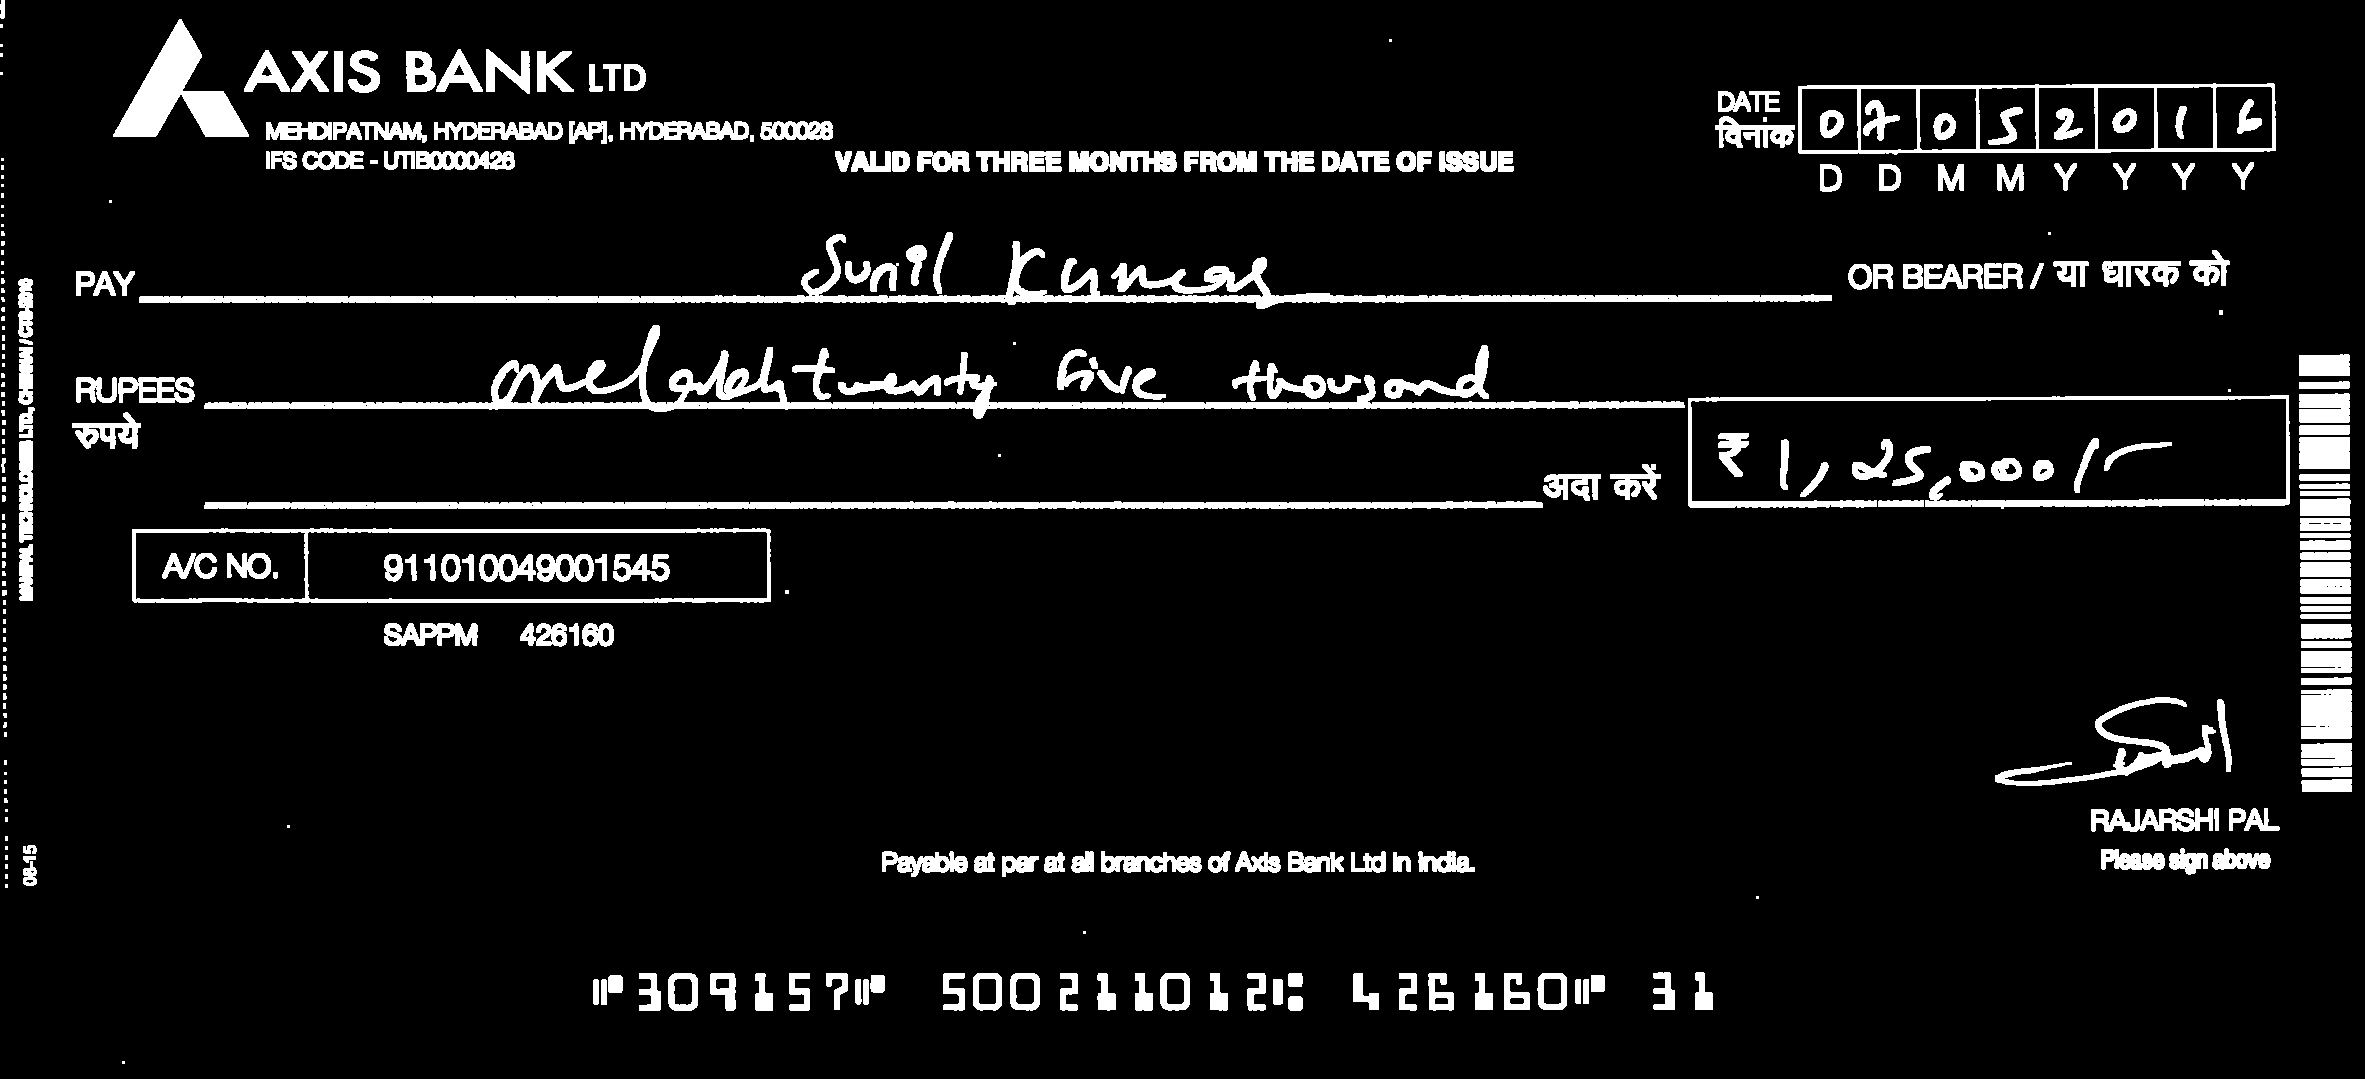

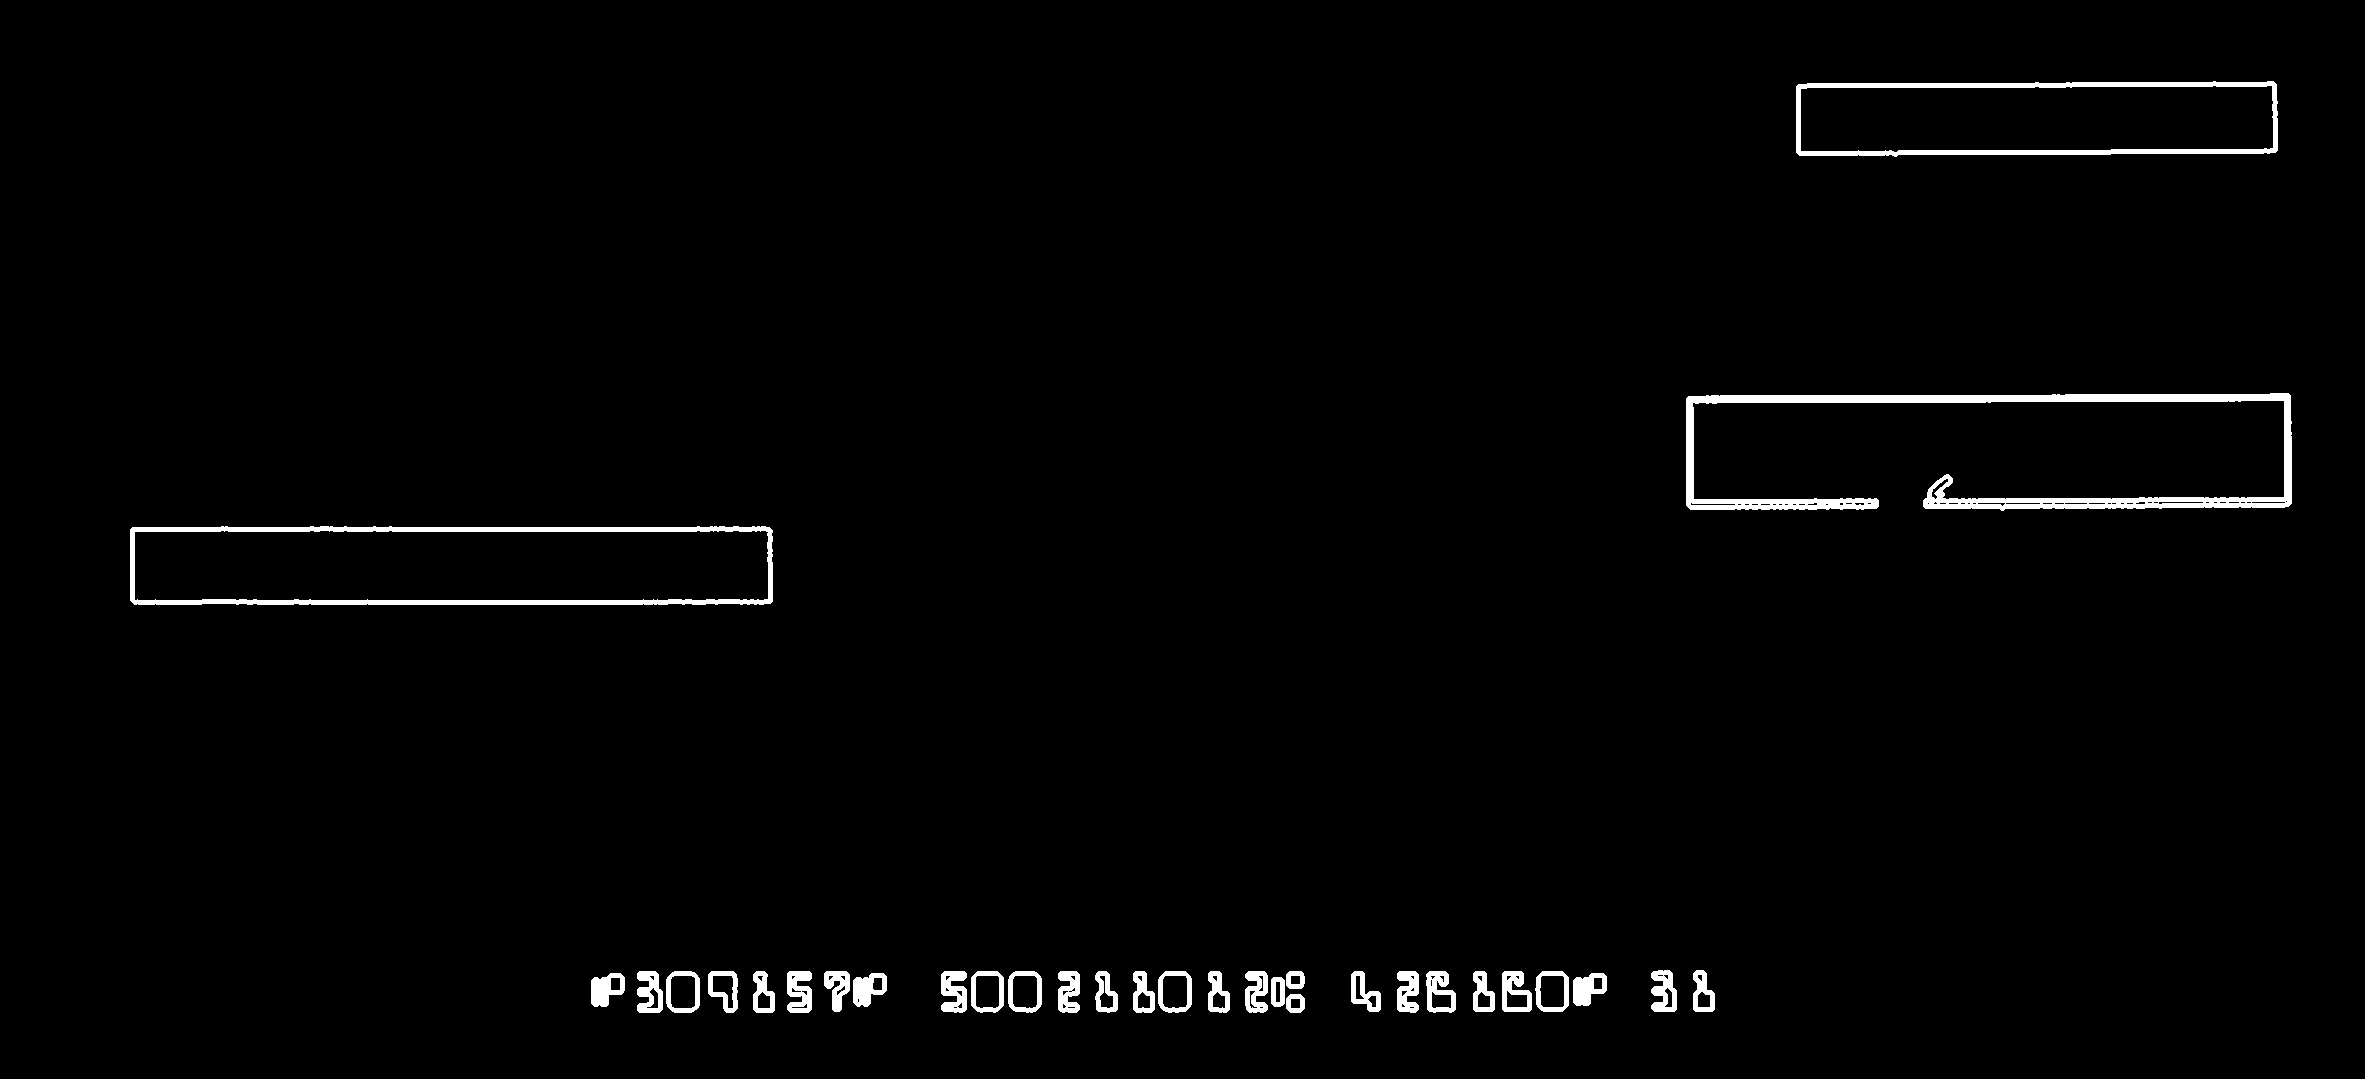

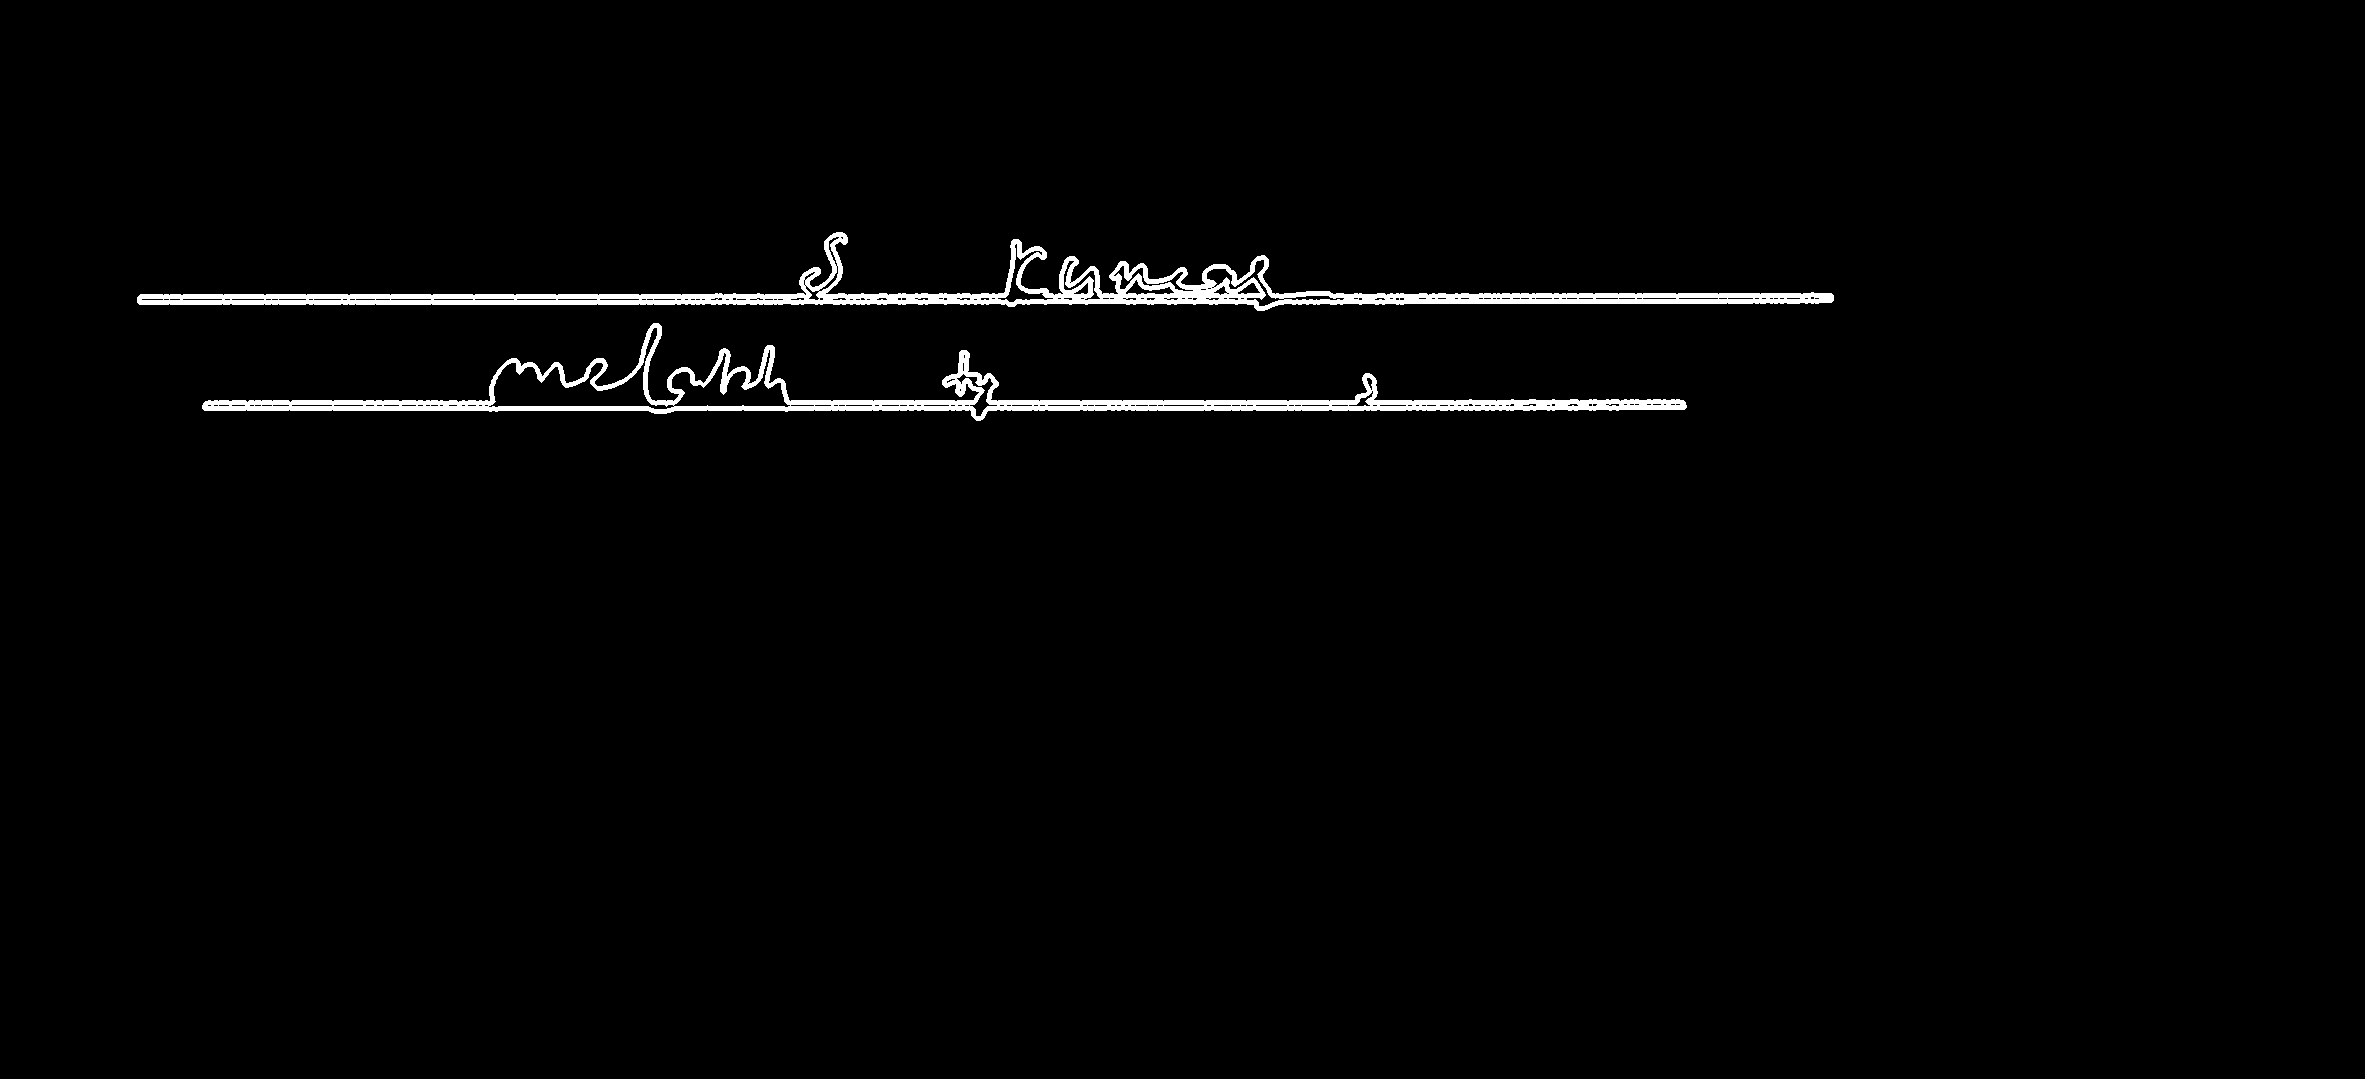

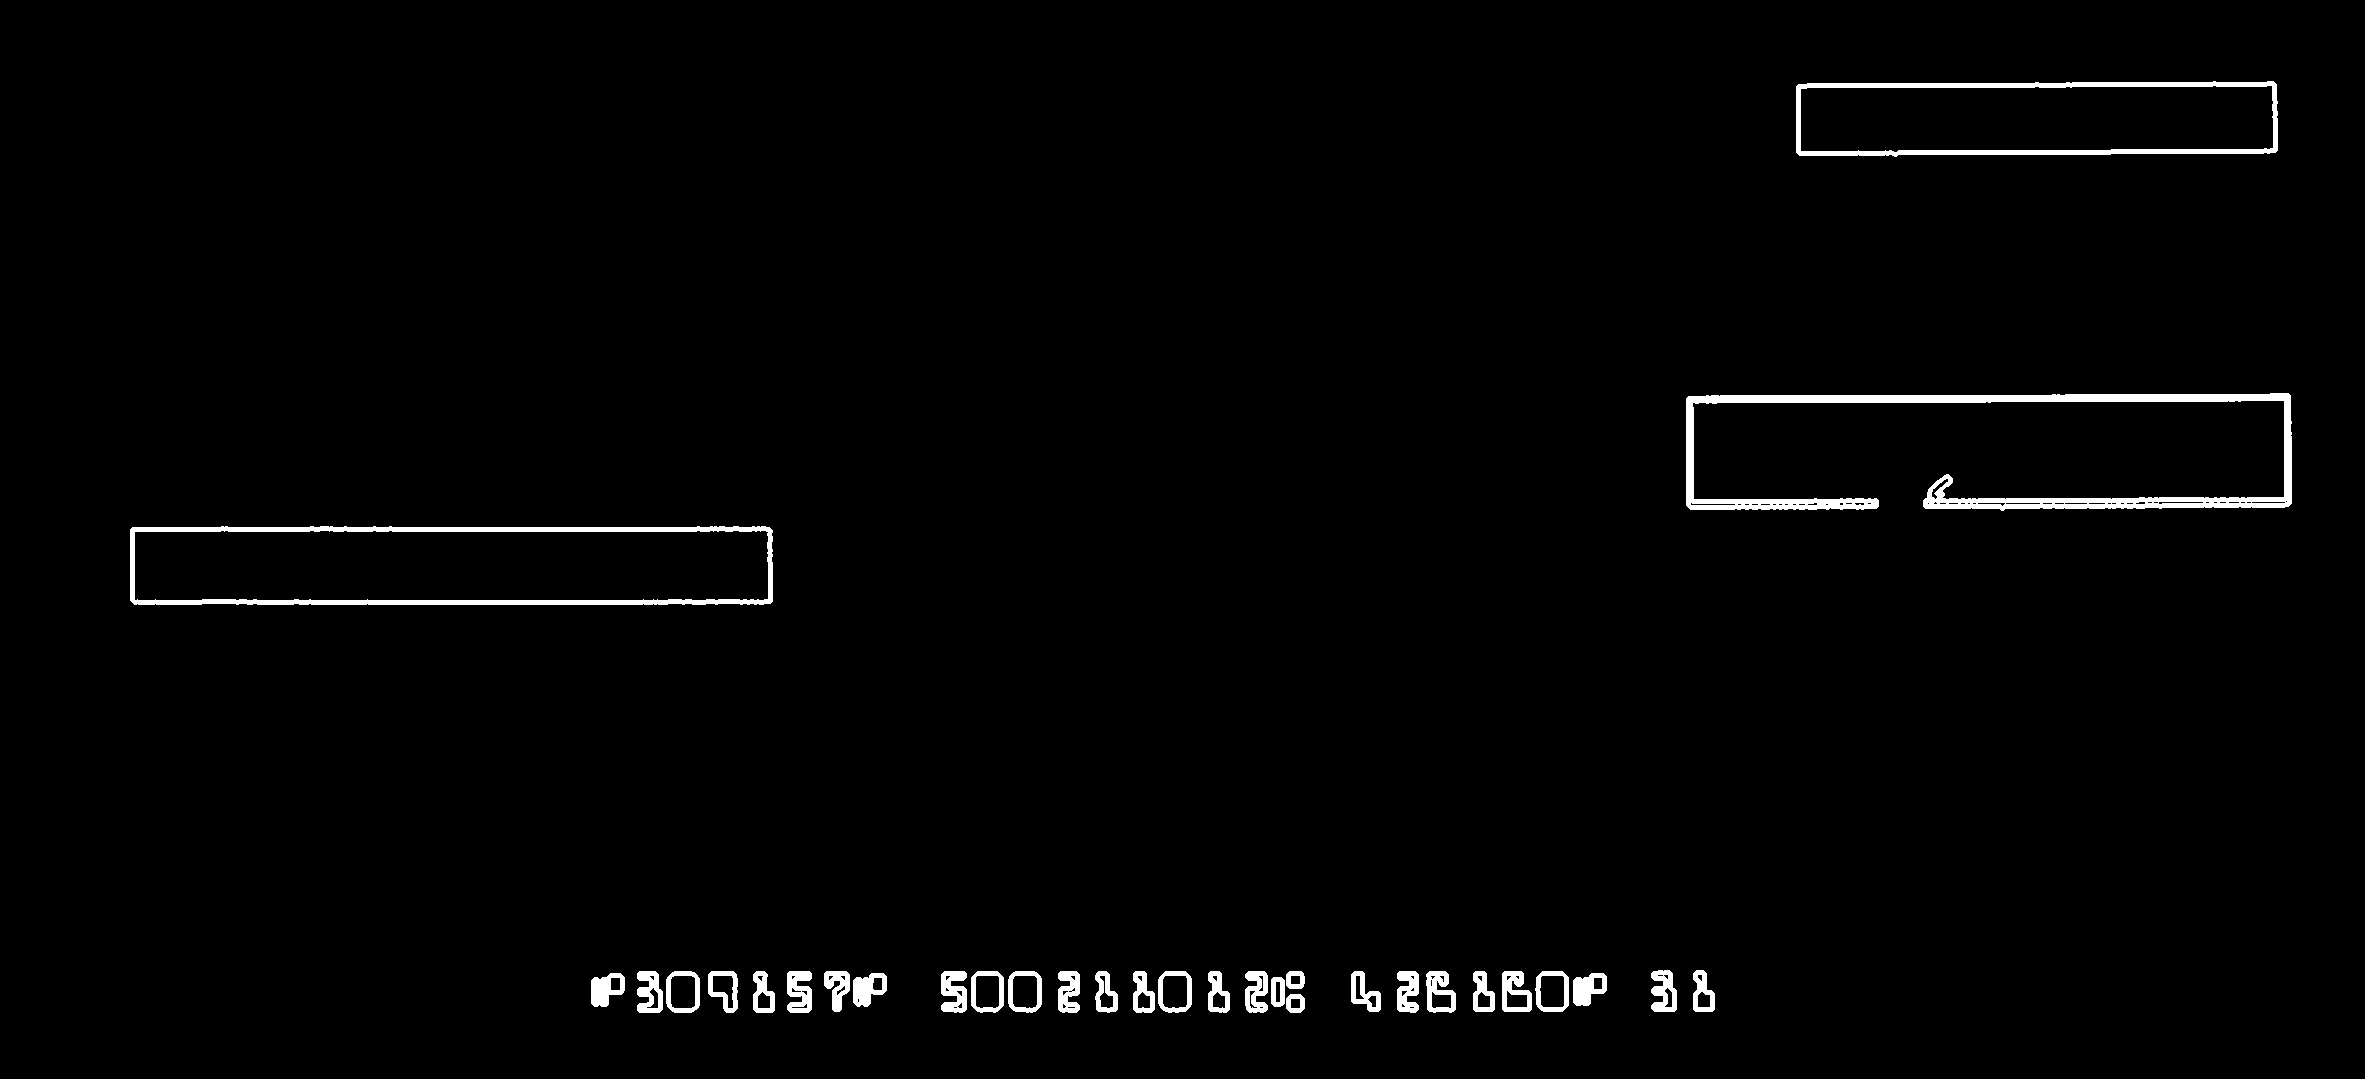

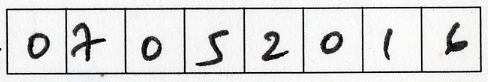

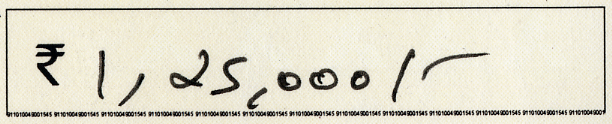

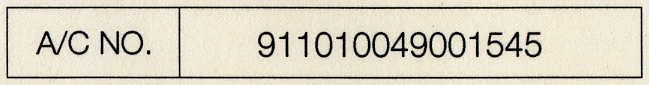

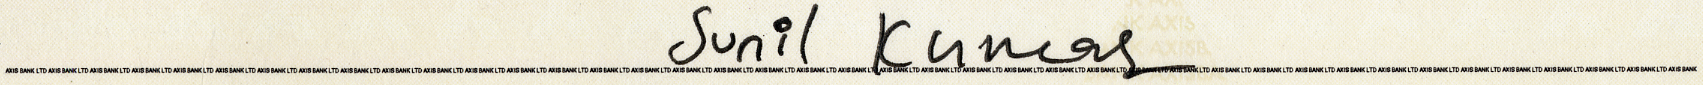

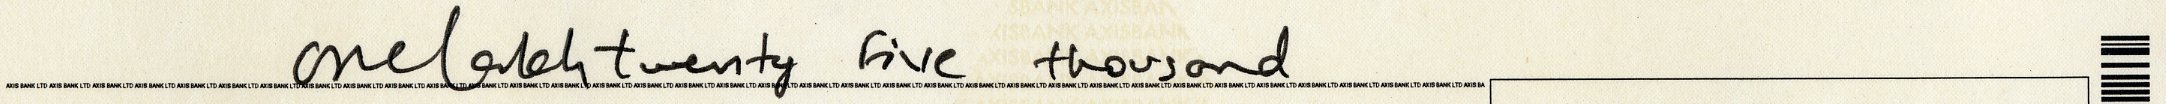

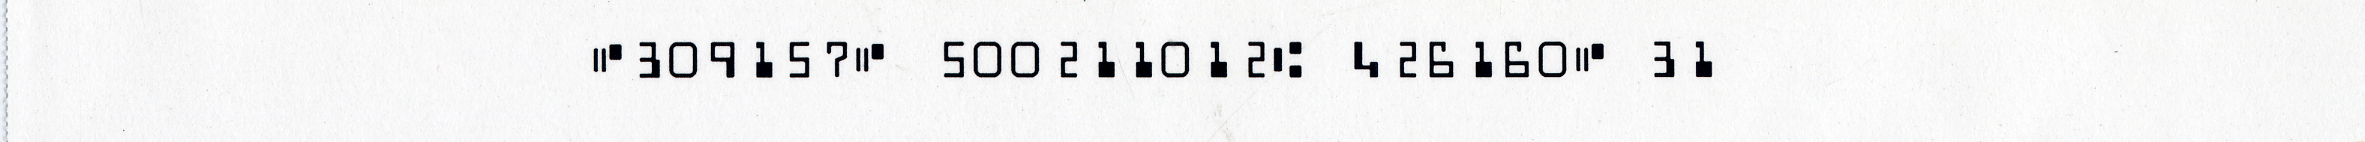

x 71 y 23 h 35 w 39
x 445 y 22 h 23 w 33
x 383 y 29 h 10 w 31
x 196 y 30 h 33 w 36
x 262 y 31 h 27 w 30
x 320 y 31 h 23 w 23
x 28 y 33 h 22 w 26
x 141 y 36 h 21 w 25


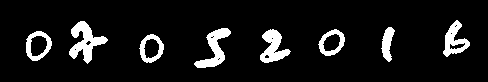

[71, 445, 383, 196, 262, 320, 28, 141]
[28, 71, 141, 196, 262, 320, 383, 445]
8
71
445
383
196
262
320
28
i 0
28
x 28
8
141
8
71
i 1
71
x 71
8
445
383
196
262
320
28
141
i 2
141
x 141
8
8
71
445
383
196
i 3
196
x 196
8
262
i 4
262
x 262
8
320
i 5
320
x 320
8
28
141
8
71
445
383
i 6
383
x 383
8
196
262
320
28
141
8
71
445
i 7
445
x 445
8
383


<ipython-input-10-285b7b3359db>:345: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  Amount.remove(cnt)


1/1 [==============================] - 0s 25ms/step


In [ ]:
filepath = '/content/Cheque 309157.tif'
Date,Amount,Acc_No,Name,Legel_Amount,mcr,Date_path,Amount_path,Acc_No_path,Name_path,Legal_Amount_path,mcr_path = get_images(filepath)

Dates = get_date(Date_path)
X_new1 = preprocess_Date(Dates)
Amounts = get_Amount(Amount_path)
X_new2 = preprocess_Amount(Amounts)
Acs = get_Acc_no(Acc_No_path)
X_new3 = preprocess_Acc_no(Acs)

from tensorflow.keras.models import load_model

# load model
model = load_model('/content/model4.h5')
# summarize model.
#model.summary()

Date = recognize_Date(X_new1)
Amount = recognize_Amount(X_new2)
Acc_no,Acc_No = predict_Acc_No(X_new3)
cheque_number,MICR_Code,Acc_ID,Trans_Code = get_mcr(mcr_path)

In [ ]:
print('Acc_No',Acc_No)
print('Amount',Amount)
print('Date',Date)
print('Cheq_No',cheque_number)
print('MICR_Code',MICR_Code)
print('Acc_ID',Acc_ID)
print('Trans_Code',Trans_Code)

Acc_No 911010049001545
Amount 125000
Date 08052016
Cheq_No 309157
MICR_Code 500211012
Acc_ID 426160
Trans_Code 31
